In [1]:
import pandas as pd,numpy as np,seaborn as sns

In [2]:
import nltk
from nltk.corpus import stopwords
from textblob import Word

In [3]:
df=pd.read_csv("amazon_alexa.tsv",sep='\t')

In [4]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [5]:
df['verified_reviews'][2]

'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.'

In [6]:

df['verified_reviews'].isnull().sum()

1

In [7]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [8]:
df[df.isnull().any(axis=1)]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

### we have to create the function for cleaning process

In [11]:
def cleaning(df,stop_words):
    
    # lowering the data
    df['verified_reviews']=df['verified_reviews'].apply(lambda x:" ".join(x.lower() for x in x.split()))
    
    # replace the digits
    df['verified_reviews']=df['verified_reviews'].str.replace("\d+"," ")
    
    # remove the stop_words
    
    df['verified_reviews']=df['verified_reviews'].apply(lambda x:" ".join(x.lower() for x in x.split() if x not in stop_words))
    
    
    # lematization
    
    df['verified_reviews']=df['verified_reviews'].apply(lambda x:" ".join([Word(x).lemmatize() for x in x.split()]))
    
    return df

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
stop_words=stopwords.words("english")
df=cleaning(df,stop_words)

In [14]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love echo!,1
1,5,31-Jul-18,Charcoal Fabric,loved it!,1
2,4,31-Jul-18,Walnut Finish,"sometimes playing game, answer question correc...",1
3,5,31-Jul-18,Charcoal Fabric,"lot fun thing. 4 yr old learns dinosaurs, cont...",1
4,5,31-Jul-18,Charcoal Fabric,music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"perfect kids, adult everyone between!!",1
3146,5,30-Jul-18,Black Dot,"listening music, searching locations, checking...",1
3147,5,30-Jul-18,Black Dot,"love things, running entire home, tv, lights, ...",1
3148,5,30-Jul-18,White Dot,complaint sound quality great. mostly use comm...,1


#### now its time to make a senitment columns with the help of the ratings columns if the rating is greator than >=3 we gives it posiive setiment 
else we give negative sentiment

In [15]:
def sentiment(df):  

    if  df['rating']>3:
        return 'positive'
    else:
        return 'negative'

In [16]:
df['sentiment']=df.apply(sentiment,axis=1)

In [17]:
df

,rating,date,variation,verified_reviews,feedback,sentiment
0,5,31-Jul-18,Charcoal Fabric,love echo!,1,positive
1,5,31-Jul-18,Charcoal Fabric,loved it!,1,positive
2,4,31-Jul-18,Walnut Finish,"sometimes playing game, answer question correc...",1,positive
3,5,31-Jul-18,Charcoal Fabric,"lot fun thing. 4 yr old learns dinosaurs, cont...",1,positive
4,5,31-Jul-18,Charcoal Fabric,music,1,positive
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"perfect kids, adult everyone between!!",1,positive
3146,5,30-Jul-18,Black Dot,"listening music, searching locations, checking...",1,positive
3147,5,30-Jul-18,Black Dot,"love things, running entire home, tv, lights, ...",1,positive
3148,5,30-Jul-18,White Dot,complaint sound quality great. mostly use comm...,1,positive


In [19]:
df2=df[['verified_reviews','sentiment']]

In [20]:
df2

,verified_reviews,sentiment
0,love echo!,positive
1,loved it!,positive
2,"sometimes playing game, answer question correc...",positive
3,"lot fun thing. 4 yr old learns dinosaurs, cont...",positive
4,music,positive
...,...,...
3145,"perfect kids, adult everyone between!!",positive
3146,"listening music, searching locations, checking...",positive
3147,"love things, running entire home, tv, lights, ...",positive
3148,complaint sound quality great. mostly use comm...,positive


In [21]:
df2.isnull().sum()

verified_reviews    0
sentiment           0
dtype: int64

In [23]:
import wordcloud
import matplotlib.pyplot as plt

In [33]:
common_words=''
for i in df2.verified_reviews:
    i=str(i)
    tokens=i.split()
    #print(tokens)
    common_words+=''.join(tokens)+' '
    
wc=wordcloud.WordCloud().generate(common_words)

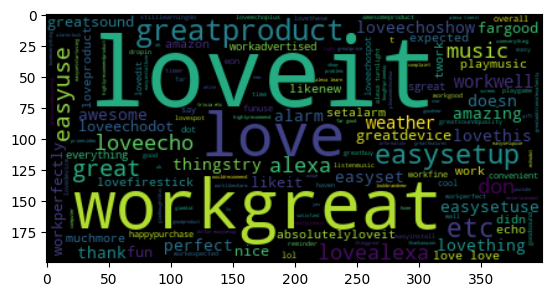

In [38]:
plt.imshow(wc,interpolation='bilinear')
plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le=LabelEncoder()

In [42]:
df2['sentiment']=le.fit_transform(df2['sentiment'])

In [43]:
df2

,verified_reviews,sentiment
0,love echo!,1
1,loved it!,1
2,"sometimes playing game, answer question correc...",1
3,"lot fun thing. 4 yr old learns dinosaurs, cont...",1
4,music,1
...,...,...
3145,"perfect kids, adult everyone between!!",1
3146,"listening music, searching locations, checking...",1
3147,"love things, running entire home, tv, lights, ...",1
3148,complaint sound quality great. mostly use comm...,1


In [44]:
from keras.preprocessing.text import Tokenizer

In [46]:
from keras.preprocessing.sequence import pad_sequences

In [47]:
tokenizer=Tokenizer(num_words=500,split=' ')

In [50]:
tokenizer.fit_on_texts(df['verified_reviews'].values)

In [56]:
x=tokenizer.texts_to_sequences(df['verified_reviews'].values)

In [59]:
x=pad_sequences(x)

In [60]:
x

array([[  0,   0,   0, ...,   0,   1,   2],
       [  0,   0,   0, ...,   0, 189,   5],
       [  0,   0,   0, ...,  41, 268,  25],
       ...,
       [  0,   0,   0, ...,  85,  16,  31],
       [  0,   0,   0, ...,   2,  61, 119],
       [  0,   0,   0, ...,   0,   0,  17]])

### now its time for modeling

In [64]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SpatialDropout1D,Embedding,LSTM

In [65]:
model=Sequential()

In [68]:
model.add(Embedding(500,120,input_length=x.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 211, 120)          60000     
                                                                 
 spatial_dropout1d (Spatial  (None, 211, 120)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269442 (1.03 MB)
Trainable params: 269442 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


now split the data into train_test

In [72]:
from sklearn.model_selection import train_test_split

In [75]:
y=pd.get_dummies(df2['sentiment'])

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [79]:
import numpy as np

In [81]:
print(x_train)
print(x_test)

[[  0   0   0 ... 129 480   5]
 [  0   0   0 ...  62  11 285]
 [  0   0   0 ...   0   0   1]
 ...
 [  0   0   0 ...   3  10  60]
 [  0   0   0 ... 193  23 224]
 [  0   0   0 ... 409 154 431]]
[[  0   0   0 ...   0  34 305]
 [  0   0   0 ...   0   1   5]
 [  0   0   0 ... 100 236  73]
 ...
 [  0   0   0 ...  16  26  68]
 [  0   0   0 ... 279   1   5]
 [  0   0   0 ... 272  27  18]]


now we have to change the data into array

In [82]:
# convert them into arays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [83]:
x_train

array([[  0,   0,   0, ..., 129, 480,   5],
       [  0,   0,   0, ...,  62,  11, 285],
       [  0,   0,   0, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ...,   3,  10,  60],
       [  0,   0,   0, ..., 193,  23, 224],
       [  0,   0,   0, ..., 409, 154, 431]])

In [84]:
batch_size=64
model.fit(x_train, y_train, epochs = 5, batch_size=batch_size, verbose = 1)

Epoch 1/5
35/35 [==============================] - 39s 976ms/step - loss: 0.4170 - accuracy: 0.8648
Epoch 2/5
35/35 [==============================] - 34s 975ms/step - loss: 0.3338 - accuracy: 0.8721
Epoch 3/5
35/35 [==============================] - 35s 988ms/step - loss: 0.2546 - accuracy: 0.9002
Epoch 4/5
35/35 [==============================] - 34s 970ms/step - loss: 0.2036 - accuracy: 0.9161
Epoch 5/5
35/35 [==============================] - 34s 980ms/step - loss: 0.1733 - accuracy: 0.9283


In [ ]:
model.evaluate(x_test,y_test)

 5/30 [====>.........................] - ETA: 3s - loss: 0.3004 - accuracy: 0.8938